<a href="https://colab.research.google.com/github/Daviaraujos/AmazonFires/blob/main/fires_in_the_amazon_estudos_tratamento_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fires in the Amazon**

Este trabalho visa fornecer informações e análises sobre os incêndios florestais na região amazônica no período de 1998 até 2017 por meio do tratamento dos dados.

Espero contribuir com a comunidade de analistas de dados e, se possível, ajudar na conscientização da importância de nossa floresta para o público.

Fonte: https://github.com/YussifAdam1/AmazonFires

In [ ]:
# DownLoad de bibliotecas
!pip install num2words
!pip install matplotlib

# Bibliotecas
import pandas as pd
from datetime import date
import locale
import matplotlib.pyplot as plt
import seaborn as sns

# Funções
def space():# Divisor
  print('______________________')
  print(' ')

def frase(texto):
  print(f'{texto}')

# Importando o banco
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTlAE0WV6WDD6qbIVHTMVci4ycxC9MPSqrfzDzMzvcdqk20GYGcLidbEd_fTk6At5sHb-cj-jOpWyZr/pub?gid=839780696&single=true&output=csv')

In [ ]:
df.head()

,year,state,month,number,date,data_formatada
0,1998,Acre,1,0.0,1998-01-01,01-01-1998
1,1999,Acre,1,0.0,1999-01-01,01-01-1999
2,2000,Acre,1,0.0,2000-01-01,01-01-2000
3,2001,Acre,1,0.0,2001-01-01,01-01-2001
4,2002,Acre,1,0.0,2002-01-01,01-01-2002


**Informações sobre o banco**

In [ ]:
# Mostrar informações sobre o banco
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [ ]:
datas = df['date']
frase(datas)

0       1998-01-01
1       1999-01-01
2       2000-01-01
3       2001-01-01
4       2002-01-01
           ...    
6449    2012-01-01
6450    2013-01-01
6451    2014-01-01
6452    2015-01-01
6453    2016-01-01
Name: date, Length: 6454, dtype: object


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
df['data_formatada'] = df['date'].dt.strftime('%d-%m-%Y')

# Buscando a primeira última data do banco
primeira_data = df['data_formatada'].min()
ultima_data = df['data_formatada'].max()

# Quantidade de queimadas em todo o período.
total_queimadas = df['number'].sum()

# formatação do número para padrão brasileiro
total_queimadas_formatado = f'{total_queimadas:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

# Número extensivo
total_queimadas_extenso = num2words(total_queimadas, lang='pt_BR')


space()
print('No período de ', primeira_data,' até ', ultima_data, 'ocorreram ', total_queimadas_formatado,'queimadas (',total_queimadas_extenso,').')

______________________
 
No período de  01-01-1998  até  01-01-2017 ocorreram  698.924,07 queimadas ( seiscentos e noventa e oito mil, novecentos e vinte e quatro vírgula zero sete três ).


**Gráficos**

**Progressão das queimadas na amazônia de 1998 até 2016**

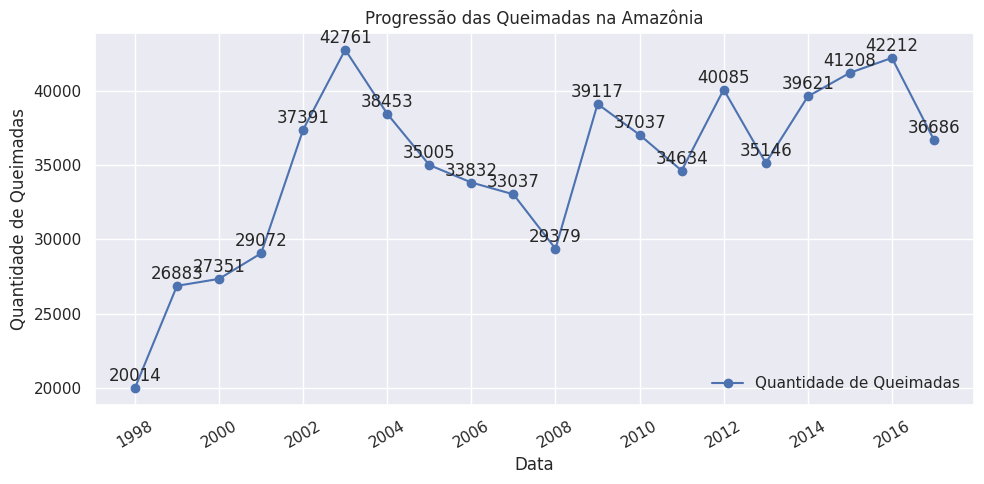

In [ ]:
sns.set_theme(style='darkgrid')

df_grouped = df.groupby(df['date'].dt.to_period('M'))['number'].sum().reset_index()
df_grouped['date'] = df_grouped['date'].dt.to_timestamp()

# Gráfico
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_grouped['date'], df_grouped['number'], marker='o', linestyle='-', color='b', label='Quantidade de Queimadas')

for i, row in df_grouped.iterrows():
    ax.annotate(f'{row["number"]:.0f}', (row['date'], row['number']), textcoords="offset points", xytext=(0, 5), ha='center')

ax.set_title('Progressão das Queimadas na Amazônia')
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade de Queimadas')
ax.legend()
ax.grid(True)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Gráfico especifico -  queimadas por estado ao longo dos anos

**Média de queimadas por estado**

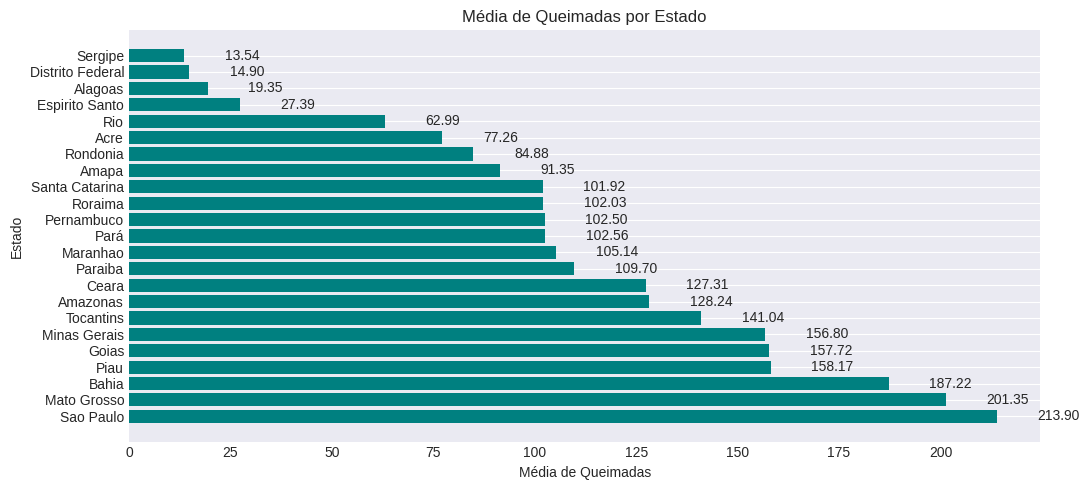

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

df_estados_media = df.groupby('state')['number'].mean().reset_index()

df_estados_media = df_estados_media.sort_values(by='number', ascending=False)

plt.figure(figsize=(11, 5))
bars = plt.barh(df_estados_media['state'], df_estados_media['number'], color='teal')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center')

plt.title('Média de Queimadas por Estado')
plt.xlabel('Média de Queimadas')
plt.ylabel('Estado')
plt.grid(axis='x')

plt.tight_layout()
plt.show()

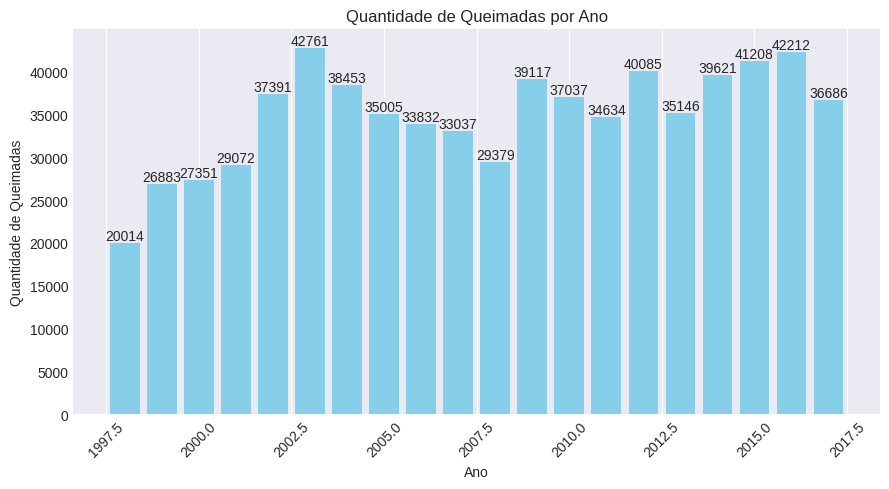

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

df['year'] = df['date'].dt.year

df_annual = df.groupby('year')['number'].sum().reset_index()

plt.figure(figsize=(9, 5))
plt.bar(df_annual['year'], df_annual['number'], color='skyblue')

for i, row in df_annual.iterrows():
    plt.text(row['year'], row['number'], f'{row["number"]:.0f}', ha='center', va='bottom')

plt.title('Quantidade de Queimadas por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Queimadas')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

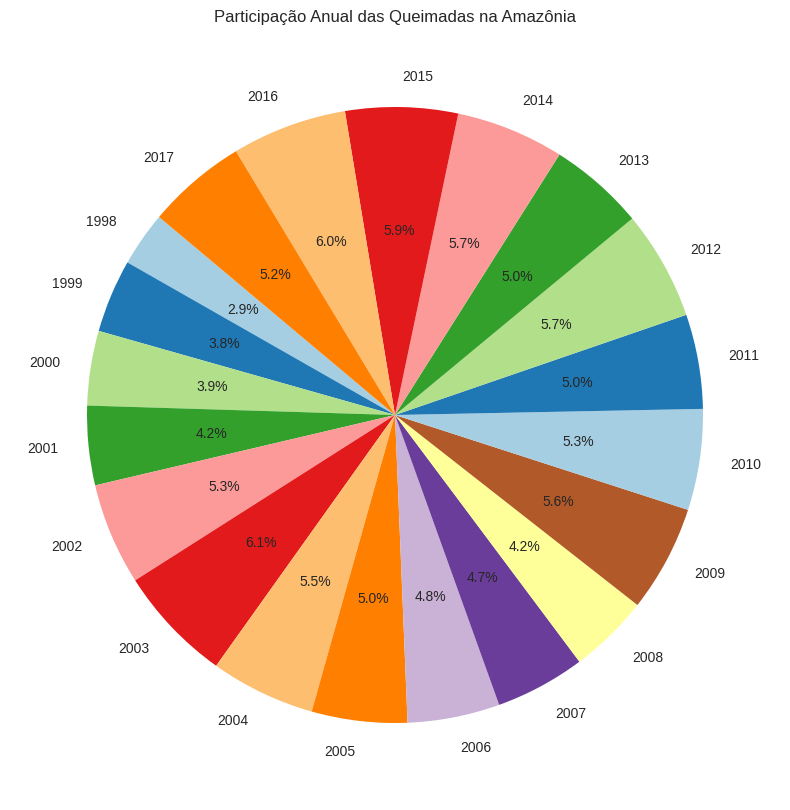

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(df_annual['number'], labels=df_annual['year'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('Queimadas na Amazônia')
plt.show()


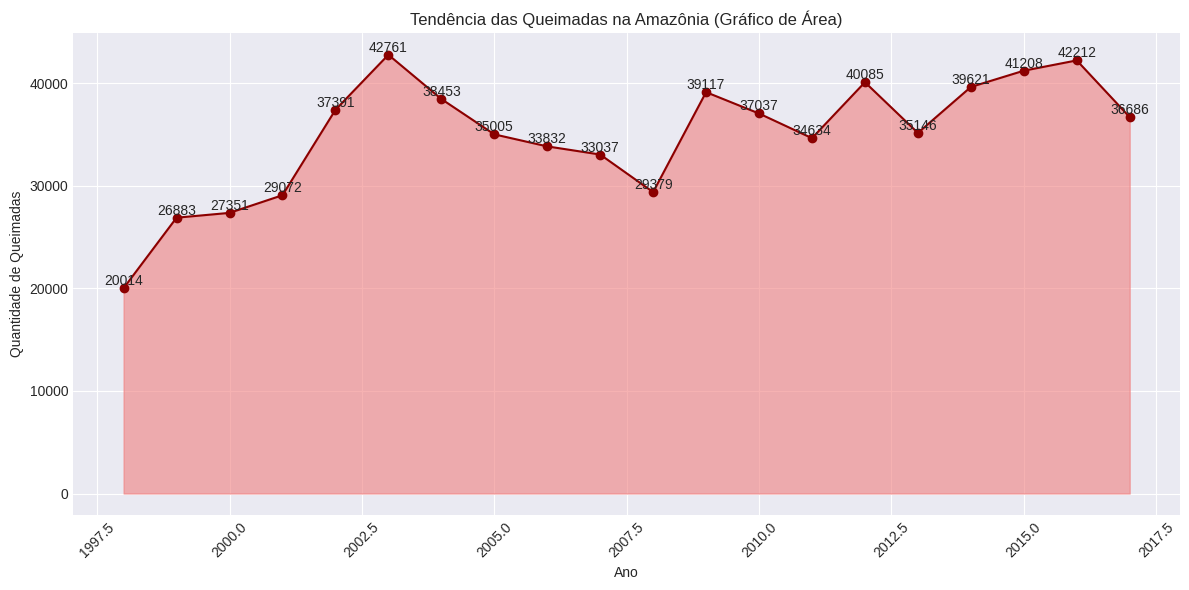

In [ ]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_annual['year'], df_annual['number'], color='lightcoral', alpha=0.6)
plt.plot(df_annual['year'], df_annual['number'], marker='o', color='darkred')

for i, row in df_annual.iterrows():
    plt.text(row['year'], row['number'], f'{row["number"]:.0f}', ha='center', va='bottom')

plt.title('Tendência das Queimadas na Amazônia (Gráfico de Área)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Queimadas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

df['year'] = df['date'].dt.year

df_annual = df.groupby('year')['number'].sum().reset_index()

primeiro_ano = df_annual.iloc[0]
ultimo_ano = df_annual.iloc[-1]

crescimento_percentual = ((ultimo_ano['number'] - primeiro_ano['number']) / primeiro_ano['number']) * 100

print(f"De {primeiro_ano['year']} até {ultimo_ano['year']}, as queimadas tiveram um aumento de {crescimento_percentual:.2f}%.")


De 1998.0 até 2017.0, as queimadas tiveram um aumento de 83.30%.


Prezados,

fiz esse tratamento e análise dos dados visando exercitar e aprimorar meus conhecimentos. É importante frisar que datas e números estão formatados no padrão brasileiro para melhor entendimento.

Analisei os registros de queimadas no período de 1998 até 2017 e levantei métricas importantes, como o aumento de 83,30%, além da forte utilização de data visualization para mostrar a evolução ao longo dos anos e facilitar a análise de sazonalidade das ocorrências.

Este trabalho ainda está em desenvolvimento, e estou aberto a feedbacks e sugestões para melhorias futuras.

No mais, enfatizo que é importante a conscientização para que todos entendam que nossas áreas verdes devem ser preservadas e cuidadas. Em breve estarei melhorando essas análises e compartilhando aqui meu trabalho.

Atenciosamente,

Davi Araújo.


_______________________________________________________________________________

**Dear all,**



**I carried out this data treatment and analysis with the aim of exercising and enhancing my knowledge. It is important to note that dates and numbers are formatted according to the Brazilian standard for better understanding.**



**I analyzed fire records from the period of 1998 to 2017 and gathered important metrics, such as an 83.30% increase, as well as making extensive use of data visualization to show the evolution over the years and facilitate the analysis of the seasonality of the occurrences.**



**This work is still in progress, and I am open to feedback and suggestions for future improvements.**



**Furthermore, I emphasize the importance of raising awareness so that everyone understands the need to preserve and care for our green areas. I will soon be improving these analyses and sharing my work here.**


**Sincerely,
Davi Araújo.**

